# **Ryan Chandra Hadi - 1301204125**

In [1]:
# import yang dibutuhkan 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

# **Import Data** 

In [2]:
url = 'https://raw.githubusercontent.com/bloodsking/Tupro2/main/water-treatment.csv'
df = pd.read_csv(url, header=None)

# **Data Pre-processing**

In [3]:
# menampilkan data df 
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [4]:
# Memberi nama kolom pada dataset DF
df.columns = ['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 
              'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 
              'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 
              'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

In [5]:
# Update dataset
df

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [6]:
# menghapus value dan kolom date dan dimasukan ke variabel baru df1
df1 = df.drop(['Date'], axis=1)

In [7]:
# melihat data yang null
df1.isna().sum()

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [8]:
# melihat detail dari setiap kolom data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    object 
 1   ZN-E      527 non-null    object 
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    object 
 4   DQO-E     527 non-null    object 
 5   SS-E      527 non-null    object 
 6   SSV-E     527 non-null    object 
 7   SED-E     527 non-null    object 
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    object 
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    object 
 13  SED-P     527 non-null    object 
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    object 
 17  DQO-D     527 non-null    object 
 18  SS-D      527 non-null    object 
 19  SSV-D     527 non-null    object 
 20  SED-D     527 non-null    object

In [9]:
# mengganti semua nilai ? pada dataset menjadi nilai nan
df1 = df1.replace('?', np.nan)

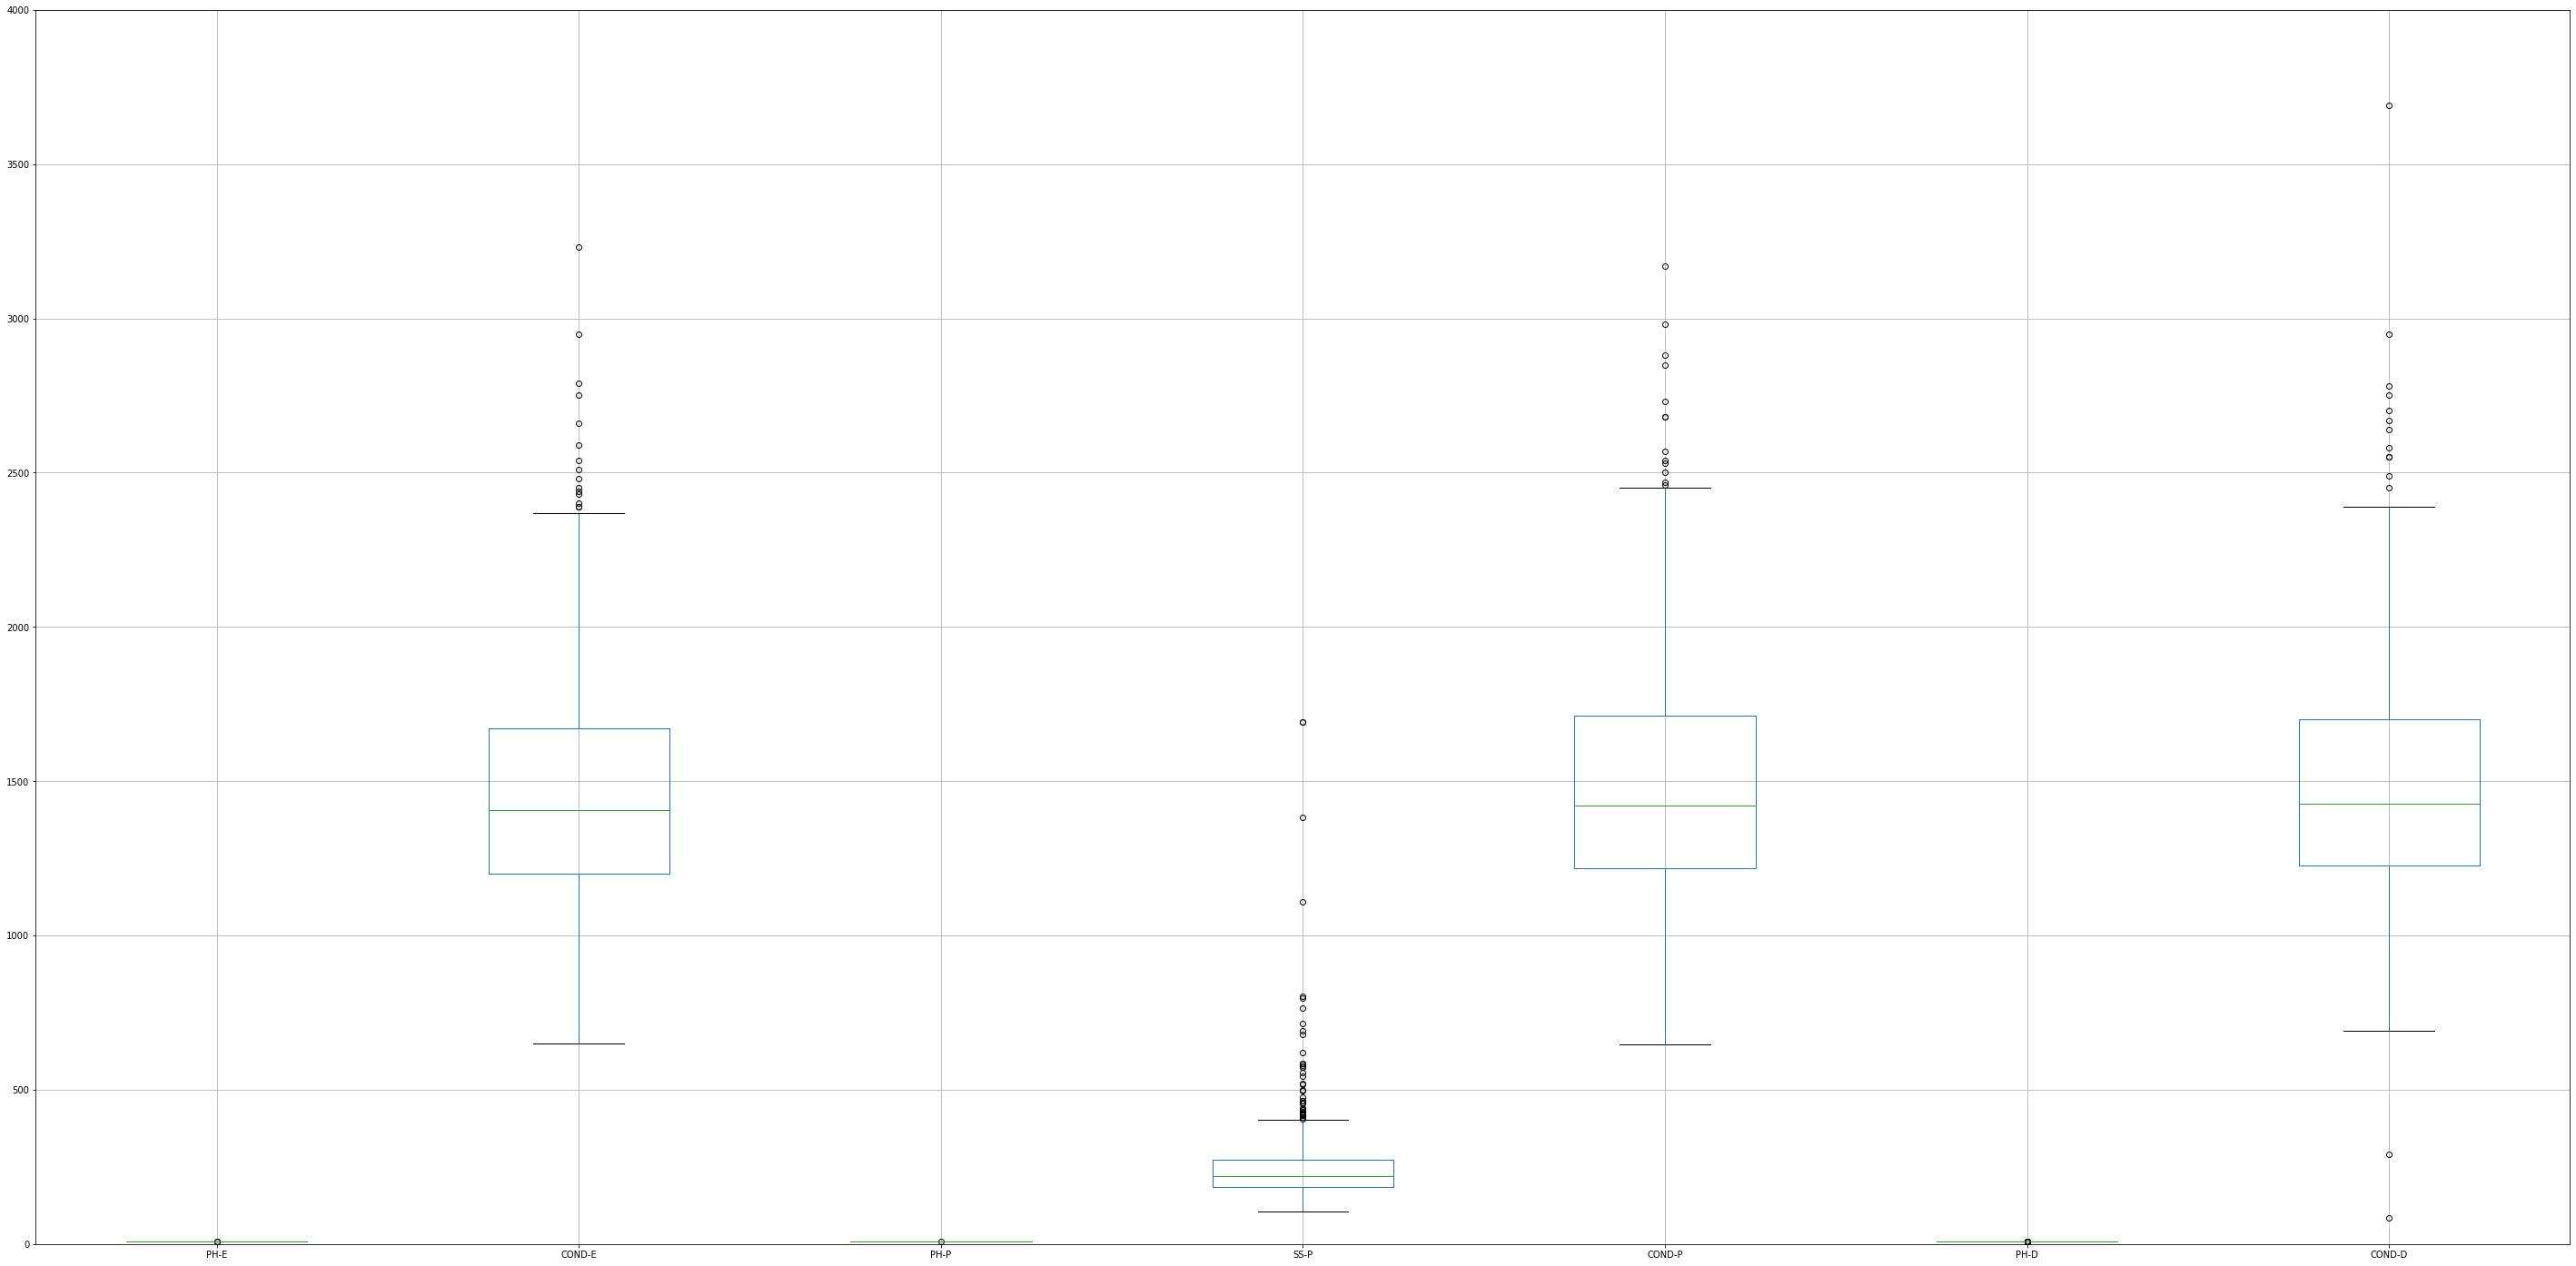

In [10]:
# menampilkan boxplot pada  
plt.figure(figsize=(50,25));
plt.ylim(0,4000)
bp = df1.boxplot()
plt.savefig("boxplot.png")

In [11]:
df1

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [12]:
# mengubah semua tipe data pada df1 menjadi float agar mudah untuk di proses
df1 = df1.astype(float)

In [13]:
#melihat informasi setelah perubahan tipe data ke float
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       509 non-null    float64
 1   ZN-E      524 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     504 non-null    float64
 4   DQO-E     521 non-null    float64
 5   SS-E      526 non-null    float64
 6   SSV-E     516 non-null    float64
 7   SED-E     502 non-null    float64
 8   COND-E    527 non-null    float64
 9   PH-P      527 non-null    float64
 10  DBO-P     487 non-null    float64
 11  SS-P      527 non-null    float64
 12  SSV-P     516 non-null    float64
 13  SED-P     503 non-null    float64
 14  COND-P    527 non-null    float64
 15  PH-D      527 non-null    float64
 16  DBO-D     499 non-null    float64
 17  DQO-D     518 non-null    float64
 18  SS-D      525 non-null    float64
 19  SSV-D     514 non-null    float64
 20  SED-D     502 non-null    float6

In [14]:
# mengisi nilai yang kosong dengan nilai rata-rata pada setiap kolom
for column_name in df1:
  df1[column_name] = df1[column_name].fillna(df1[column_name].mean())

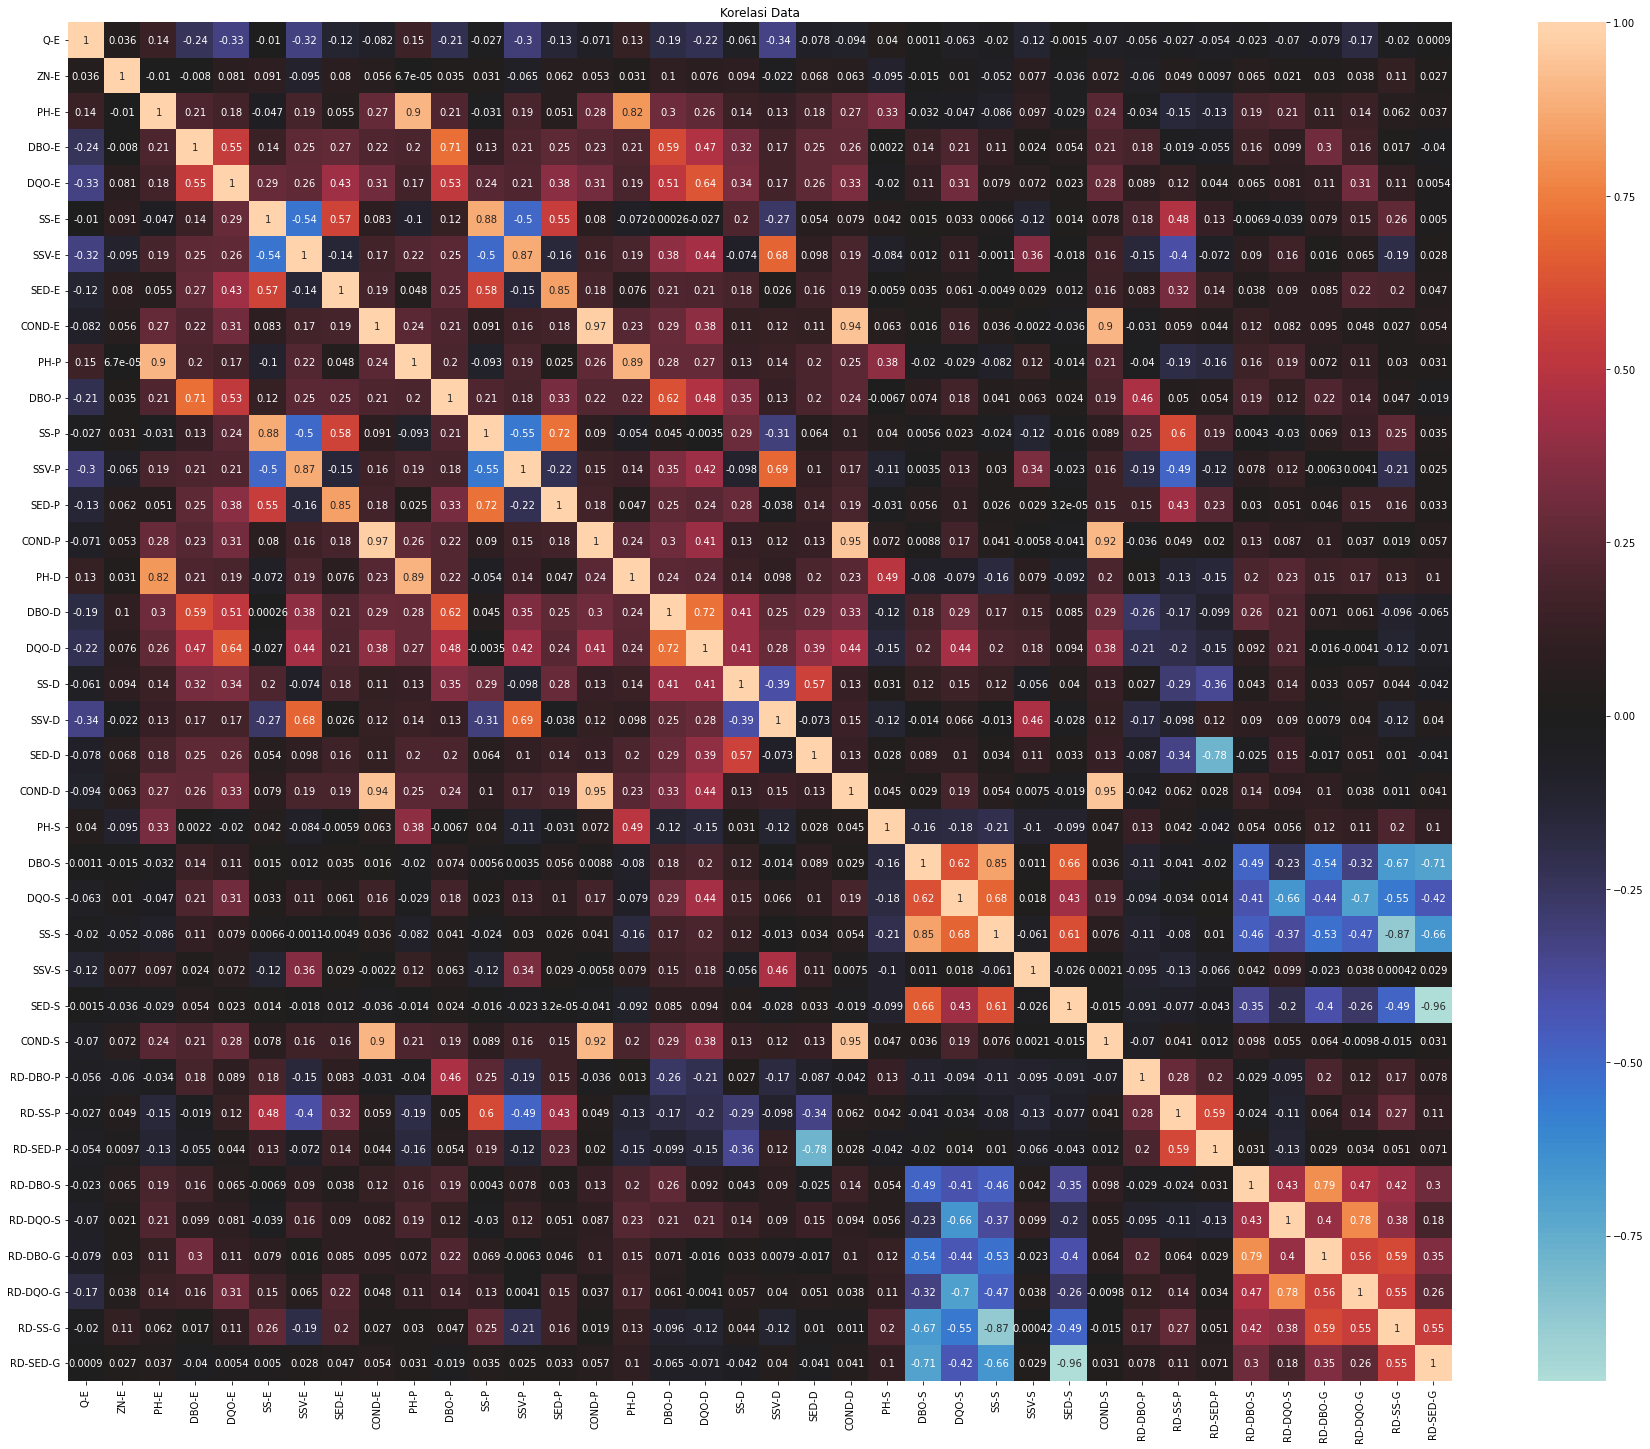

In [15]:
# memvisualisasikan heatmap untuk melihat korelasi antar kolom

plt.figure(figsize=(31,25))
sns.heatmap(df1.corr(), center=0, annot=True)
plt.title("Korelasi Data")
plt.savefig("heatmap.png")
plt.show()

In [16]:
# normalisasi data dengan range nilai 1-100
df1 = ((df1-df1.min()) / (df1.max()-df1.min()))*99+1

In [17]:
df1

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,68.379205,5.149701,50.5,39.362934,38.527907,4.524607,74.215877,12.401685,57.006592,50.50,...,40.909091,49.536240,59.331498,95.173348,87.122045,72.188679,89.784896,76.536122,86.555556,99.377358
1,58.332974,9.595808,45.0,39.362934,42.672093,7.012565,78.214485,17.963483,78.119426,34.00,...,58.787879,49.536240,61.403084,94.422535,87.122045,83.396226,89.784896,76.661597,91.888889,100.000000
2,44.887210,15.523952,39.5,39.362934,52.456977,5.561257,79.179666,9.342697,39.962776,34.00,...,37.515152,49.536240,58.677313,95.280607,87.122045,54.443396,89.784896,72.019011,88.111111,97.665094
3,50.415902,11.077844,56.0,43.324324,59.363953,5.872251,73.250696,12.401685,69.290423,42.25,...,36.060606,41.987261,65.219163,94.958830,91.530636,74.575472,91.302326,80.174905,89.111111,100.000000
4,54.177550,5.149701,61.5,52.324324,48.773256,5.042932,72.147632,11.011236,57.006592,50.50,...,44.545455,49.536240,63.583700,95.280607,87.122045,73.226415,93.732558,75.030418,86.777778,99.221698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,45.864724,1.177844,45.0,16.081081,20.684884,5.042932,61.116992,6.283708,10.328034,34.00,...,8.848485,49.536240,63.147577,92.813651,71.501734,78.311321,77.744186,75.532319,96.888889,99.377358
523,47.471488,1.652096,50.5,40.162162,31.505814,4.835602,77.387187,11.011236,13.936409,42.25,...,9.090909,49.536240,58.786344,97.640303,86.609249,60.877358,92.453488,70.513308,90.333333,100.000000
524,46.258500,1.592814,28.5,27.270270,33.923256,5.250262,71.596100,8.230337,16.700271,17.50,...,14.727273,49.536240,66.091410,96.889491,78.826590,68.452830,80.813953,73.650190,88.333333,98.443396
525,44.810038,1.592814,23.0,42.108108,54.413953,9.293194,72.561281,11.011236,24.377666,9.25,...,20.484848,50.436943,67.072687,96.889491,85.121387,73.122642,90.406977,86.072243,89.000000,99.688679


In [18]:
# melihat data df1 setelah di normalisasi
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    float64
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    float64
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    float64
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527 non-null    float6

# **Clustering with K-Means**

In [19]:
df1.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,54.776263,7.696031,51.053131,39.362934,38.516196,7.709446,67.450257,12.662602,32.769844,44.723435,...,25.600530,49.536240,59.024836,89.868535,87.122045,69.923681,89.784896,74.599503,88.403768,98.577716
std,12.904505,8.126469,13.539620,14.762622,13.776486,7.039434,16.938597,7.447094,15.158939,18.721296,...,11.743553,17.522142,13.905548,9.344593,9.685834,11.754275,8.675801,10.885134,9.065390,6.730487
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,46.341608,3.371257,39.500000,29.459459,29.261047,4.731937,59.807103,8.786517,22.112834,34.000000,...,17.727273,39.528025,50.390969,88.094258,85.235838,65.339623,88.232558,70.074144,87.000000,98.754717
50%,52.774600,5.149701,50.500000,38.459459,37.722093,6.079581,71.044568,12.401685,29.982164,42.250000,...,23.727273,49.536240,59.876652,92.813651,88.898266,71.462264,90.918605,75.657795,90.333333,99.533019
75%,62.429034,9.595808,61.500000,47.459459,46.298256,8.463874,78.766017,15.182584,40.193098,58.750000,...,31.560606,60.336943,68.053965,95.387866,91.988439,77.377358,93.988372,81.304183,92.888889,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [20]:
# membuat dafaframe yang berisikan kolom yang memiliki korelasi yang kuat pada heatmap yang sudah dibuat di atas
cluster = pd.DataFrame({
    "PH-E" : df1["PH-E"],
    "PH-P" : df1["PH-P"],
    "PH-D" : df1["PH-D"],
    "DBO-E" : df1["DBO-E"],
    "DBO-P" : df1["DBO-P"],
    "DQO-E" : df1["DQO-E"],
    "DQO-D" : df1["DQO-D"],
    "SS-E" : df1["SS-E"],
    "SS-P" : df1["SS-P"],
    "SSV-E" : df1["SSV-E"],
    "SSV-P" : df1["SSV-P"],
    "SED-E" : df1["SED-E"],
    "SED-P" : df1["SED-P"],
    "COND-E" : df1["COND-E"],
    "COND-P" : df1["COND-P"],
    "RD-SED-G" : df1["RD-SED-G"],
    "SED-S" : df1["SED-S"],
    "RD-SS-G" : df1["RD-SS-G"],
    "SS-S" : df1["SS-P"],
    "RD-SED-P" : df1["RD-SED-P"],
    "SED-P" : df1["SED-P"]

    })

In [21]:
# melihat info data cluster setelah dibuat
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PH-E      527 non-null    float64
 1   PH-P      527 non-null    float64
 2   PH-D      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DBO-P     527 non-null    float64
 5   DQO-E     527 non-null    float64
 6   DQO-D     527 non-null    float64
 7   SS-E      527 non-null    float64
 8   SS-P      527 non-null    float64
 9   SSV-E     527 non-null    float64
 10  SSV-P     527 non-null    float64
 11  SED-E     527 non-null    float64
 12  SED-P     527 non-null    float64
 13  COND-E    527 non-null    float64
 14  COND-P    527 non-null    float64
 15  RD-SED-G  527 non-null    float64
 16  SED-S     527 non-null    float64
 17  RD-SS-G   527 non-null    float64
 18  SS-S      527 non-null    float64
 19  RD-SED-P  527 non-null    float64
dtypes: float64(20)
memory usage: 82.

In [22]:
# mem-plot kan nilai centroid secara random dengan range 1 sampai 100 secara float
def random_cent(cluster, k):
    centroids = []
    random.seed(30)
    for i in range(k):
        centroid = cluster.apply(lambda x: random.uniform(1, 100))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [23]:
# mencoba melihat hasil random jika k di set sebagai 3
centroids = random_cent(cluster, 3)

In [24]:
# melihat hasil random centroid yang sudah dibuat
centroids

,0,1,2
PH-E,54.369075,53.985273,41.562894
PH-P,29.630448,7.695472,75.240063
PH-D,3.973654,3.327496,30.794515
DBO-E,65.709940,80.724134,52.850506
DBO-P,21.790861,67.525002,19.450500
DQO-E,26.470421,76.538162,64.893046
DQO-D,40.322628,56.999594,51.797383
SS-E,64.516237,67.715482,86.403559
SS-P,98.892310,64.233559,94.897820
SSV-E,46.691768,89.622389,52.481825


In [25]:
# fungsi untuk menggunakan jarak untuk melihat data point 
# yang tercover dengan jarak menggunakan rumus canberra
def label(cluster, centroids):
    canberra = centroids.apply(lambda x: (np.abs(cluster - x)/(np.abs(cluster)+np.abs(x))).sum(axis=1))
    return canberra.idxmin(axis=1)

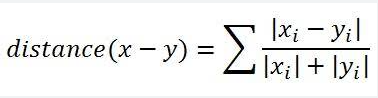

In [26]:
# memplot nilai dengan centorid yang sudah di set 3
labels = label(cluster, centroids)

In [27]:
# hasil clustering pertama
labels.value_counts()

0    321
2    192
1     14
dtype: int64

In [28]:
# fungsi untuk memperbarui nilai centorid dengan rumus geometric mean
def new_cent(cluster, labels, k):
    return cluster.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [29]:
# memvisualisasikan gambar scatter berdasarkan labels, centorid yang sudah di buat

def plot_cluster(cluster, labels, centroids, itter):
    pca = PCA(n_components=2)
    cluster2D = pca.fit_transform(cluster)
    centroids2D = pca.transform(centroids.T)

    plt.title(f'Iteration {itter}')
    sns.scatterplot(x=cluster2D[:,0], y=cluster2D[:,1], c=labels, marker=">")
    sns.scatterplot(x=centroids2D[:,0], y=centroids2D[:,1], marker="o")
    plt.show()

In [30]:
# main program
def final(k):
    max = 50
    centroids = random_cent(cluster, k)
    temp = pd.DataFrame()
    iteration = 1

    while iteration < max and not (centroids.equals(temp)):
        temp = centroids
        labels = label(cluster, centroids)
        centroids = new_cent(cluster, labels, k)
        plot_cluster(cluster, labels, centroids, iteration)
        df1["Cluster"] = labels
        iteration +=1

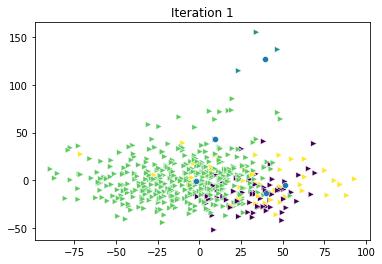

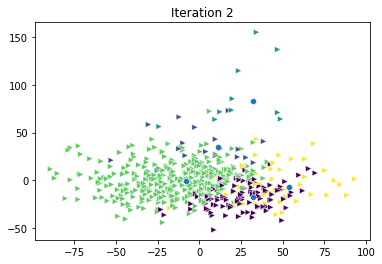

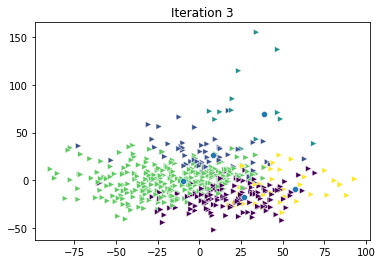

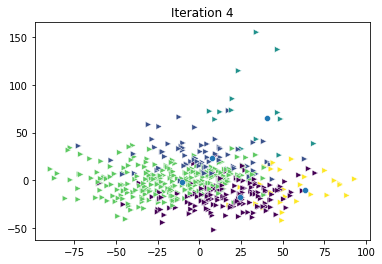

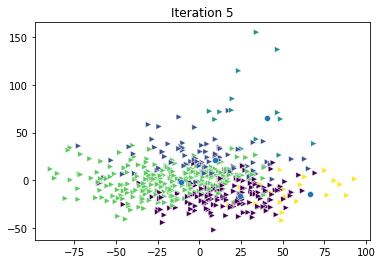

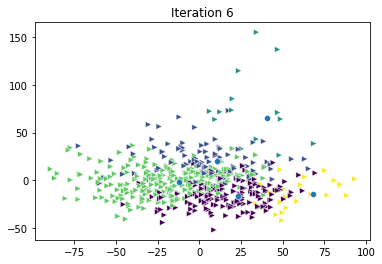

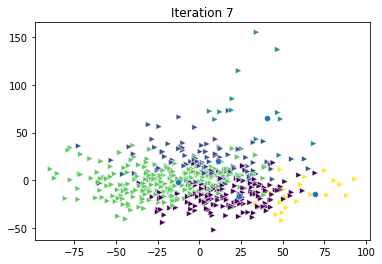

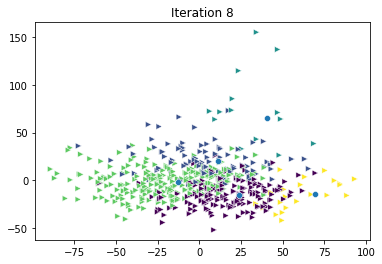

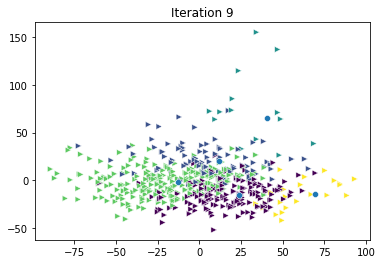

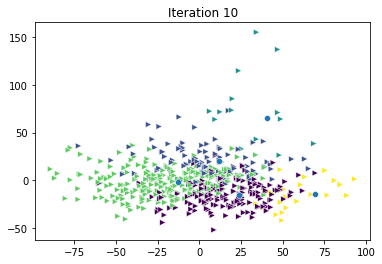

In [36]:
final(5)

In [32]:
centroids

,0,1,2
PH-E,54.369075,53.985273,41.562894
PH-P,29.630448,7.695472,75.240063
PH-D,3.973654,3.327496,30.794515
DBO-E,65.709940,80.724134,52.850506
DBO-P,21.790861,67.525002,19.450500
DQO-E,26.470421,76.538162,64.893046
DQO-D,40.322628,56.999594,51.797383
SS-E,64.516237,67.715482,86.403559
SS-P,98.892310,64.233559,94.897820
SSV-E,46.691768,89.622389,52.481825


In [33]:
# melihat hasil nilai per cluster
for i in range (3):
    print("Class: ", i)
    print(cluster[labels == i].describe())
    print("")

Class:  0
             PH-E       PH-P        PH-D       DBO-E       DBO-P       DQO-E  \
count  321.000000  321.00000  321.000000  321.000000  321.000000  321.000000   
mean    47.467290   39.50000   51.342200   36.790423   34.100543   34.066557   
std     12.280689   16.24887   13.862327   14.813962   14.185392   11.718656   
min      1.000000    1.00000    1.000000    1.000000    1.000000    1.000000   
25%     39.500000   25.75000   39.076923   26.783784   24.270103   26.440698   
50%     45.000000   42.25000   54.307692   35.540541   32.026804   32.772093   
75%     56.000000   50.50000   61.923077   43.324324   40.600000   41.751163   
max     83.500000   83.50000   92.384615  100.000000   94.692784   77.667442   

            DQO-D        SS-E        SS-P       SSV-E       SSV-P       SED-E  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean    40.263594    6.664343    8.994415   66.425440   61.473452   11.248619   
std     14.769894    3.807

In [34]:
# hasil klasterisasi nilai terakhir
df1["Cluster"].value_counts()

2    294
0    148
1     85
Name: Cluster, dtype: int64

In [35]:
# data setelah dimasukan kolom cluster
df1

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,Cluster
0,68.379205,5.149701,50.5,39.362934,38.527907,4.524607,74.215877,12.401685,57.006592,50.50,...,49.536240,59.331498,95.173348,87.122045,72.188679,89.784896,76.536122,86.555556,99.377358,2
1,58.332974,9.595808,45.0,39.362934,42.672093,7.012565,78.214485,17.963483,78.119426,34.00,...,49.536240,61.403084,94.422535,87.122045,83.396226,89.784896,76.661597,91.888889,100.000000,2
2,44.887210,15.523952,39.5,39.362934,52.456977,5.561257,79.179666,9.342697,39.962776,34.00,...,49.536240,58.677313,95.280607,87.122045,54.443396,89.784896,72.019011,88.111111,97.665094,2
3,50.415902,11.077844,56.0,43.324324,59.363953,5.872251,73.250696,12.401685,69.290423,42.25,...,41.987261,65.219163,94.958830,91.530636,74.575472,91.302326,80.174905,89.111111,100.000000,2
4,54.177550,5.149701,61.5,52.324324,48.773256,5.042932,72.147632,11.011236,57.006592,50.50,...,49.536240,63.583700,95.280607,87.122045,73.226415,93.732558,75.030418,86.777778,99.221698,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,45.864724,1.177844,45.0,16.081081,20.684884,5.042932,61.116992,6.283708,10.328034,34.00,...,49.536240,63.147577,92.813651,71.501734,78.311321,77.744186,75.532319,96.888889,99.377358,0
523,47.471488,1.652096,50.5,40.162162,31.505814,4.835602,77.387187,11.011236,13.936409,42.25,...,49.536240,58.786344,97.640303,86.609249,60.877358,92.453488,70.513308,90.333333,100.000000,2
524,46.258500,1.592814,28.5,27.270270,33.923256,5.250262,71.596100,8.230337,16.700271,17.50,...,49.536240,66.091410,96.889491,78.826590,68.452830,80.813953,73.650190,88.333333,98.443396,0
525,44.810038,1.592814,23.0,42.108108,54.413953,9.293194,72.561281,11.011236,24.377666,9.25,...,50.436943,67.072687,96.889491,85.121387,73.122642,90.406977,86.072243,89.000000,99.688679,2
